# 1. Introducción a los espacios de color

* RGB: Representa una imagen como una combinación de rojo, verde y azul.
* Grayscale: Representa una imagen con un solo canal de intensidad, desde el negro al blanco.
* HSV: Representa una imagen en términos de tono (Hue), saturación (Saturation) y valor (Value).

In [1]:
!pip install scikit-image watermark -q

# Install OpenCV package first
!pip install opencv-python -q

# First install the required system library
!apt-get update && apt-get install -y libgl1-mesa-glx

!pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.2 MB/s eta 0:00:00
Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [4,572 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packa

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 2. Conversión de espacios de color con OpenCV

In [4]:
# Leer una imagen a color (RGB por defecto en OpenCV)
imagen_rgb = cv2.imread('/content/kitty_sad.jpeg')
imagen_rgb = cv2.cvtColor(imagen_rgb, cv2.COLOR_BGR2RGB) # Convertir de BGR a RGB para matplotlib

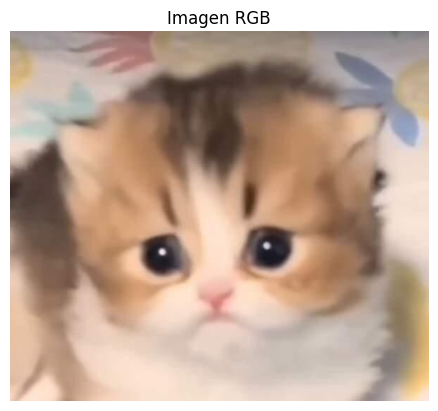

In [7]:
import cv2
import matplotlib.pyplot as plt

# Leer la imagen (en formato BGR)
imagen_rgb = cv2.imread('/content/kitty_sad.jpeg')

# Validar que se haya leído correctamente
if imagen_rgb is None:
    print("No se pudo cargar la imagen.")
else:
    # Convertir a RGB
    imagen_rgb = cv2.cvtColor(imagen_rgb, cv2.COLOR_BGR2RGB)
    # Mostrarla
    plt.imshow(imagen_rgb)
    plt.axis('off')
    plt.title("Imagen RGB")
    plt.show()


Text(0.5, 1.0, 'RGB')

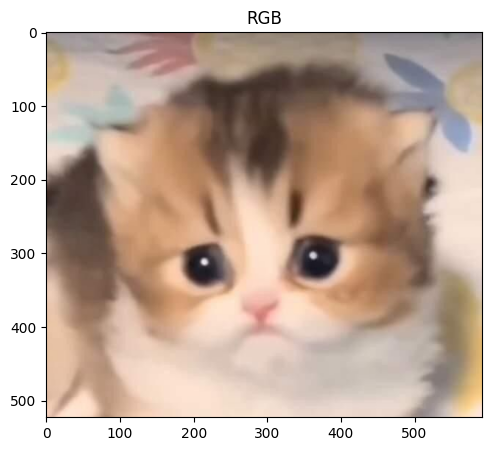

In [8]:
# Mostrar las imágenes
plt.figure(figsize=(10, 5))
plt.imshow(imagen_rgb)
plt.title('RGB')

In [9]:
# Convertir a escala de grises
imagen_gris = cv2.cvtColor(imagen_rgb, cv2.COLOR_RGB2GRAY)

Text(0.5, 1.0, 'Grayscale')

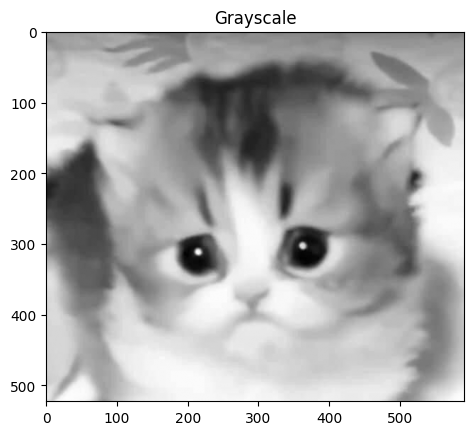

In [10]:
plt.imshow(imagen_gris, cmap='gray')
plt.title('Grayscale')

In [11]:
# Convertir a HSV
imagen_hsv = cv2.cvtColor(imagen_rgb, cv2.COLOR_RGB2HSV)

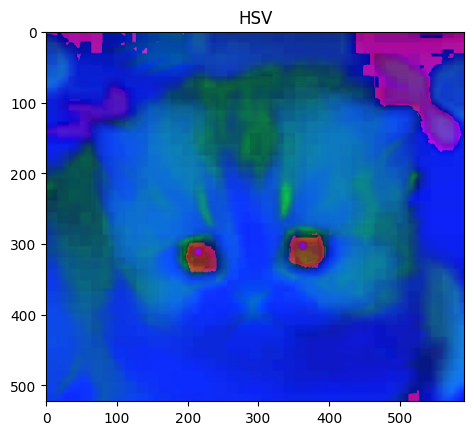

In [12]:
plt.imshow(imagen_hsv)
plt.title('HSV')
plt.show()

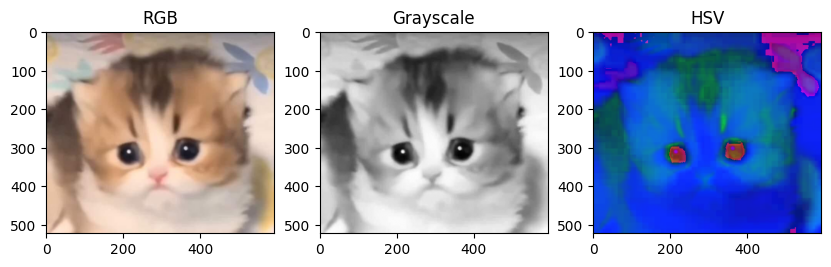

In [13]:
# Mostrar las imágenes
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(imagen_rgb)
plt.title('RGB')
plt.subplot(1, 3, 2)
plt.imshow(imagen_gris, cmap='gray')
plt.title('Grayscale')
plt.subplot(1, 3, 3)
plt.imshow(imagen_hsv)
plt.title('HSV')
plt.show()

# 3. Manipulación de canales de color

In [14]:
# Extraer los canales de color
r, g, b = cv2.split(imagen_rgb)
h, s, v = cv2.split(imagen_hsv)

In [15]:
# Crear imágenes con un solo canal
imagen_r = cv2.merge([r, np.zeros_like(g), np.zeros_like(b)])
imagen_g = cv2.merge([np.zeros_like(r), g, np.zeros_like(b)])
imagen_b = cv2.merge([np.zeros_like(r), np.zeros_like(g), b])

imagen_h = cv2.merge([h, np.zeros_like(s), np.zeros_like(v)])
imagen_s = cv2.merge([np.zeros_like(h), s, np.zeros_like(v)])
imagen_v = cv2.merge([np.zeros_like(h), np.zeros_like(s), v])

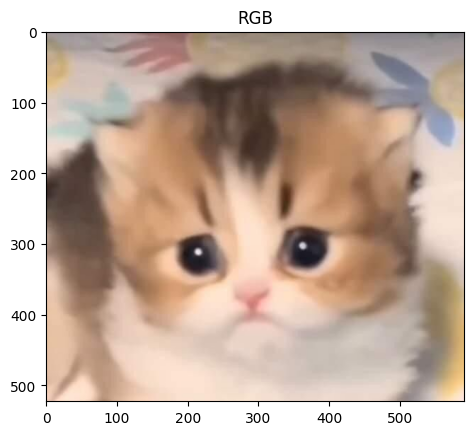

In [16]:
plt.imshow(imagen_rgb)  # Fixed: 'color RGB' was invalid syntax, using the correct variable name 'imagen_rgb'
plt.title('RGB')
plt.show()

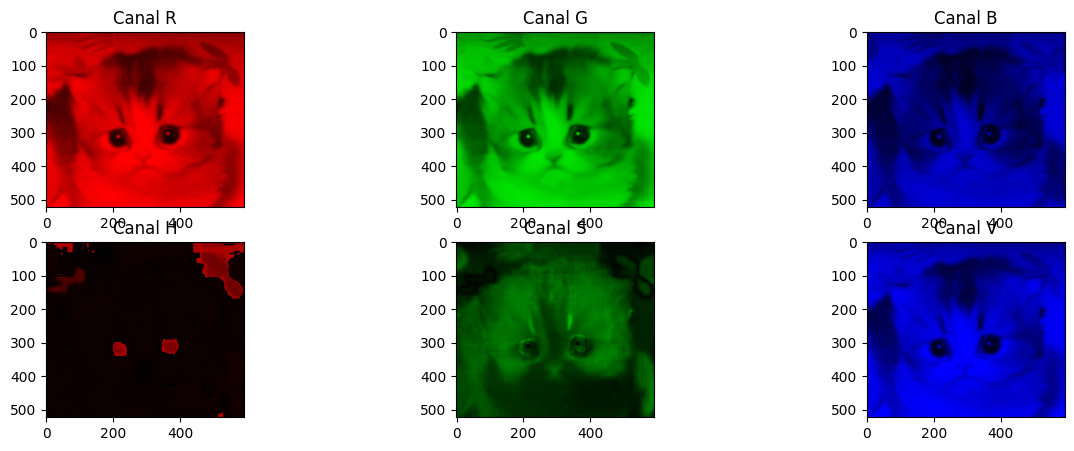

In [17]:
# Mostrar los canales
plt.figure(figsize=(15, 5))
plt.subplot(2, 3, 1)
plt.imshow(imagen_r)
plt.title('Canal R')
plt.subplot(2, 3, 2)
plt.imshow(imagen_g)
plt.title('Canal G')
plt.subplot(2, 3, 3)
plt.imshow(imagen_b)
plt.title('Canal B')
plt.subplot(2, 3, 4)
plt.imshow(imagen_h, cmap='hsv')
plt.title('Canal H')
plt.subplot(2, 3, 5)
plt.imshow(imagen_s)
plt.title('Canal S')
plt.subplot(2, 3, 6)
plt.imshow(imagen_v)
plt.title('Canal V')
plt.show()

In [18]:
# 4. Ajuste de brillo y contraste
# Función para ajustar brillo y contraste
def ajustar_brillo_contraste(imagen, brillo=0, contraste=1.0):
    imagen_ajustada = cv2.convertScaleAbs(imagen, alpha=contraste, beta=brillo)
    return imagen_ajustada

In [19]:
# Ajustar brillo y contraste
imagen_brillo_100 = ajustar_brillo_contraste(imagen_rgb, brillo=100)
imagen_contraste_2 = ajustar_brillo_contraste(imagen_rgb, contraste=2.0)

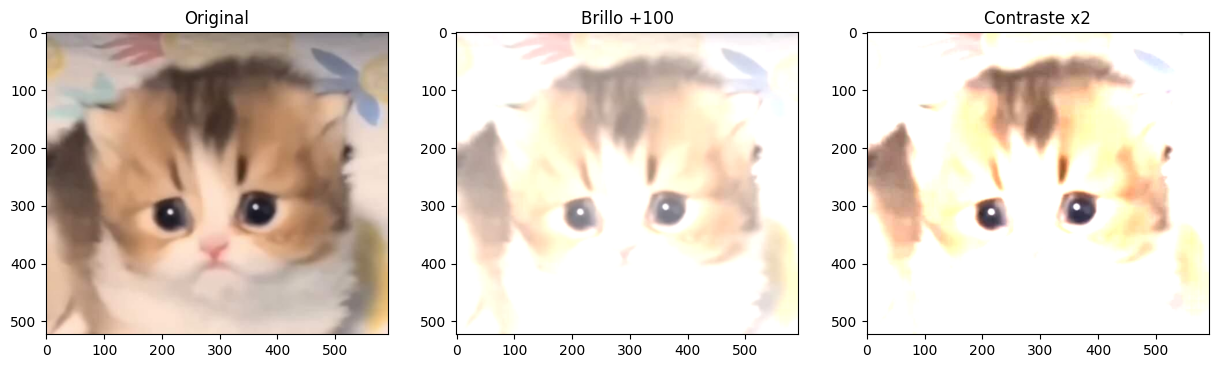

In [20]:
# Mostrar los resultados
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(imagen_rgb)
plt.title('Original')
plt.subplot(1, 3, 2)
plt.imshow(imagen_brillo_100)
plt.title('Brillo +100')
plt.subplot(1, 3, 3)
plt.imshow(imagen_contraste_2)
plt.title('Contraste x2')
plt.show()

In [21]:
# Ajustar brillo y contraste en HSV
imagen_hsv_ajustada = imagen_hsv.copy()
imagen_hsv_ajustada[:,:,2] = np.clip(imagen_hsv_ajustada[:,:,2] * 1.5, 0, 255) # Aumentar el valor (brillo)
imagen_rgb_ajustada_hsv = cv2.cvtColor(imagen_hsv_ajustada, cv2.COLOR_HSV2RGB)

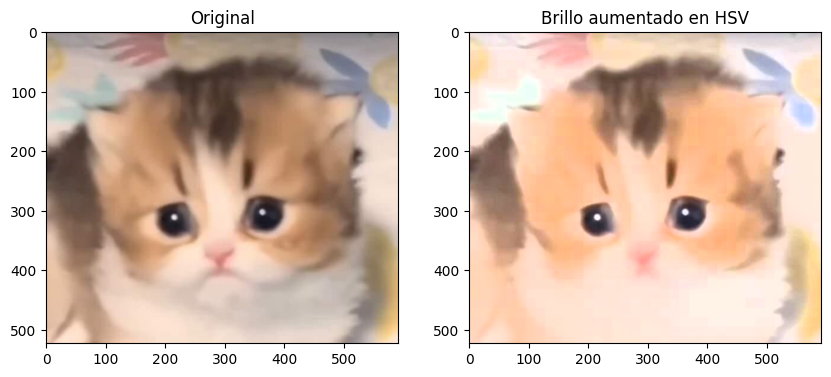

In [22]:
# Mostrar el resultado del ajuste de brillo en HSV
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(imagen_rgb)
plt.title('Original')
plt.subplot(1, 2, 2)
plt.imshow(imagen_rgb_ajustada_hsv)
plt.title('Brillo aumentado en HSV')
plt.show()

# 5. Aplicaciones prácticas

In [23]:
# Leer una imagen a color (RGB por defecto en OpenCV)
imagen_rgb = cv2.imread('/content/kitty_sad.jpeg')
imagen_rgb = cv2.cvtColor(imagen_rgb, cv2.COLOR_BGR2RGB) # Convertir de BGR a RGB para matplotlib

In [24]:
# Convertir a HSV
imagen_hsv = cv2.cvtColor(imagen_rgb, cv2.COLOR_RGB2HSV)

In [25]:
# Segmentación básica por color utilizando HSV
# Definir el rango de color a segmentar (ejemplo: rojo)
limite_inferior_rojo = np.array([120, 100, 100])
limite_superior_rojo = np.array([190, 255, 255])

In [26]:
# En HSV, el rojo se encuentra en dos regiones debido a la forma circular de la representación del matiz (H):

#Rango bajo (rojo oscuro hasta rojo puro):
#Mínimo: (0, 100, 0)
#Máximo: (180, 255, 255)

#Rango alto (rojo puro hasta rojo brillante):
#Mínimo: (170, 120, 100)
#Máximo: (180, 255, 255)

#Explicación:
#H (Hue - Matiz): El rojo está alrededor de 0° y 180° en la escala de OpenCV.
#S (Saturation - Saturación): Valores altos garantizan que el rojo sea vibrante.
#V (Value - Brillo): Ajustando este parámetro puedes detectar distintos niveles de luz en la imagen.

In [27]:
# Crear una máscara para el color rojo
mascara_roja = cv2.inRange(imagen_hsv, limite_inferior_rojo, limite_superior_rojo)

In [28]:
# Aplicar la máscara a la imagen original
resultado_rojo = cv2.bitwise_and(imagen_rgb, imagen_rgb, mask=mascara_roja)

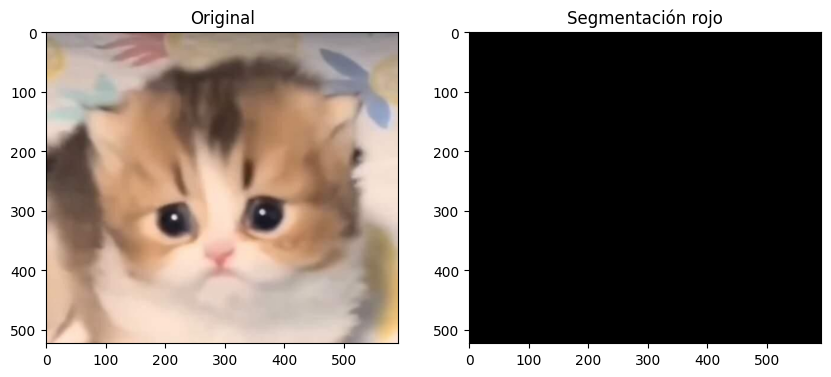

In [29]:
# Mostrar el resultado
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(imagen_rgb)
plt.title('Original')
plt.subplot(1, 2, 2)
plt.imshow(resultado_rojo)
plt.title('Segmentación rojo')
plt.show()

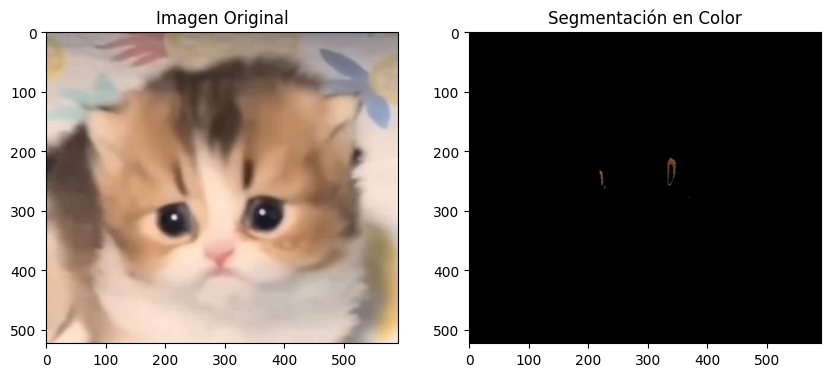

In [30]:
# Definir rangos de rojo
rojo_bajo = np.array([00, 140, 90])
rojo_alto = np.array([20, 255, 255])
rojo_bajo2 = np.array([120, 100, 200])
rojo_alto2 = np.array([190, 255, 255])

#rojo_bajo = np.array([0, 120, 90])
#rojo_alto = np.array([10, 255, 255])
#rojo_bajo2 = np.array([170, 110, 70])
#rojo_alto2 = np.array([180, 255, 255])

# Crear máscara para ambos rangos
mascara1 = cv2.inRange(imagen_hsv, rojo_bajo, rojo_alto)
mascara2 = cv2.inRange(imagen_hsv, rojo_bajo2, rojo_alto2)

# Combinar máscaras
mascara_roja = cv2.bitwise_or(mascara1, mascara2)

# Aplicar la máscara a la imagen original para obtener la segmentación en color
imagen_segmentada = cv2.bitwise_and(imagen_rgb, imagen_rgb, mask=mascara_roja)

# Mostrar la imagen original y la segmentación en color juntas
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(imagen_rgb)
plt.title('Imagen Original')

plt.subplot(1, 2, 2)
plt.imshow(imagen_segmentada)  # Mostrar la segmentación en color
plt.title('Segmentación en Color')

plt.show()